[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)  
[타이타닉 캐글 링크](https://www.kaggle.com/c/titanic)  
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

# [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)  

Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.  
`  　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　-Lisa Kleypas`  
  
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.  
  
It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.  
  
The Objective of this notebook is to give an __idea how is the workflow in any predictive modeling problem__. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.  
  
If You Like the notebook and think that it helped you..__PLEASE UPVOTE__. It will keep me motivated.  
  
### Contents of the Notebook:  
__Part1: Exploratory Data Analysis(EDA)__:  
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

__Part2: Feature Engineering and Data Cleaning__:  
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

__Part3: Predictive Modeling__  
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

# DeepL 번역
때때로 인생은 잔인한 유머 감각을 가지고 있어서 최악의 순간에 항상 원하던 것을 주기도 합니다.  
`  　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　-Lisa Kleypas`  
  
타이타닉의 침몰은 역사상 가장 악명 높은 난파선 사고 중 하나입니다. 1912년 4월 15일, 처녀 항해 중이던 타이타닉은 빙산과 충돌하여 침몰했고 승객과 승무원 2224명 중 1502명이 사망했습니다. 그래서 다이타닉이라는 이름이 붙었습니다. 전 세계 누구도 잊을 수 없는 매우 잊을 수 없는 재앙입니다.  
  
타이타닉을 만드는 데 약 750만 달러가 소요되었고 충돌로 인해 바다 밑으로 가라앉았습니다. 타이타닉 데이터 집합은 초보자가 데이터 과학의 여정을 시작하고 Kaggle의 경연 대회에 참가하기에 매우 좋은 데이터 집합입니다.  
  
이 노트북의 목적은 __예측 모델링 문제의 워크플로우에 대한 아이디어를 제공하는 것입니다__. 기능을 확인하는 방법, 새로운 기능을 추가하는 방법 및 몇 가지 머신 러닝 개념에 대해 설명합니다. 초보자도 노트북의 모든 단계를 이해할 수 있도록 가능한 한 기본적인 내용을 담으려고 노력했습니다.  
  
노트북이 마음에 드시고 도움이 되었다고 생각되시면 __업보트를 해주세요__. 계속 동기부여가 될 거예요.  
  
### Contents of the Notebook:  
__1부: 탐색적 데이터 분석(EDA)__:  
1)특징 분석.

2)여러 특징을 고려한 관계나 추세 찾기.

__2부: 특징 엔지니어링 및 데이터 정리__:  
1)몇 가지 피처 추가하기.

2)중복되는 피처 제거하기.

3)피처를 모델링에 적합한 형태로 변환하기.

__파트3: 예측 모델링__:  
1)기본 알고리즘 실행하기.

2)교차 검증.

3)앙상블.

4)중요 특징 추출.

In [39]:
import numpy as np, pandas as pd, matplotlib as mpl, seaborn as sns, warnings
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('./input/001_titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

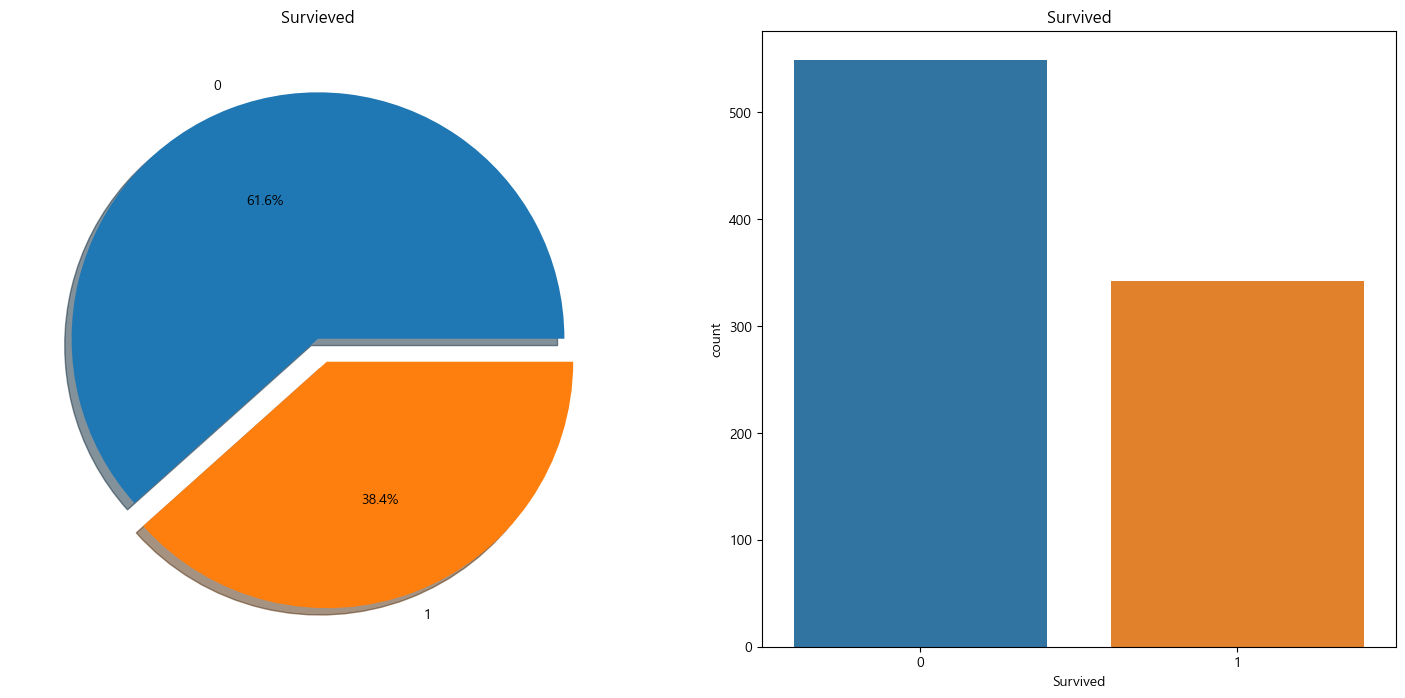

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survieved')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show();

## Types Of Features  
- Categorical Features:  
  A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
  
  Categorical Features in the dataset: Sex,Embarked.
  
- Ordinal Features:  
  An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
  
  Ordinal Features in the dataset: PClass
  
- Continous Feature:  
  A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
  
  Continous Features in the dataset: Age  
  
## Analysing The Features

In [43]:
## Sex -> Categorical Feature

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

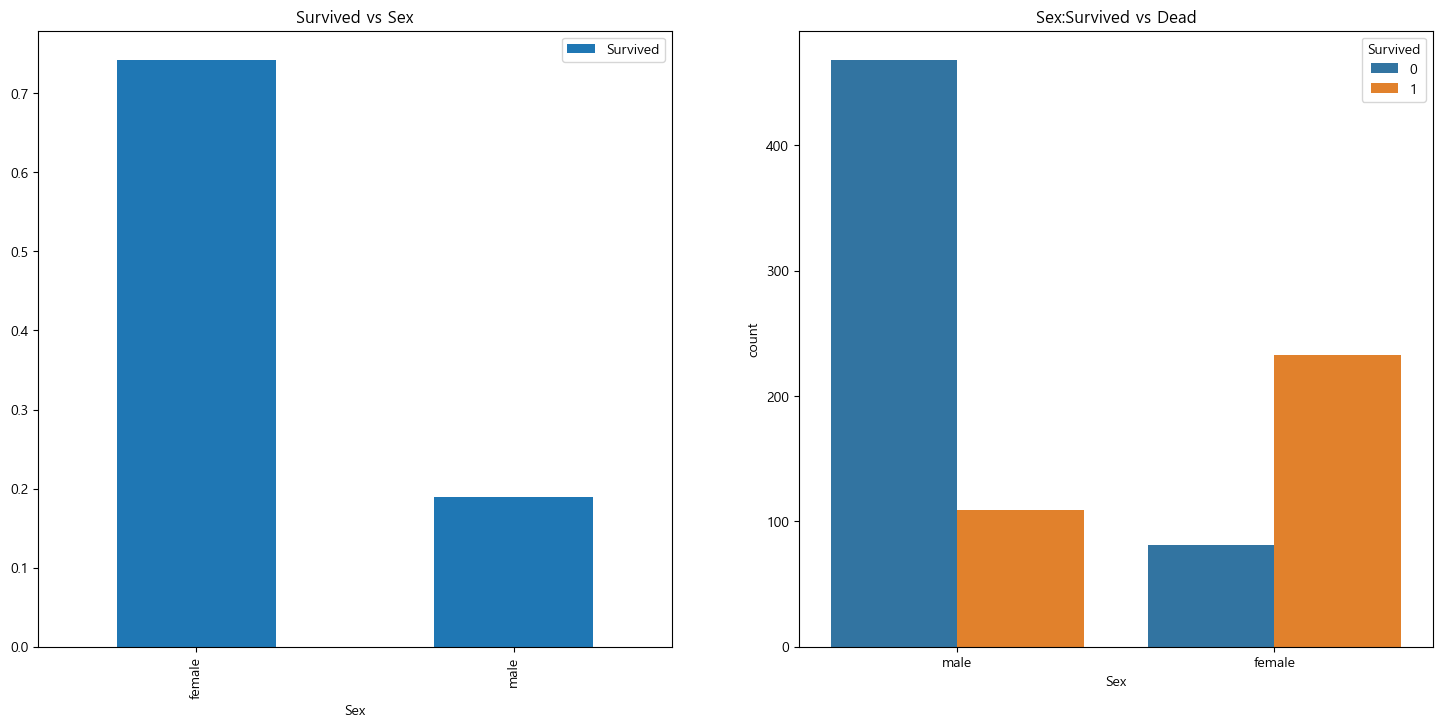

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [45]:
## Pclass --> Ordinal Feature
pd.crosstab(index=data.Pclass, columns=data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


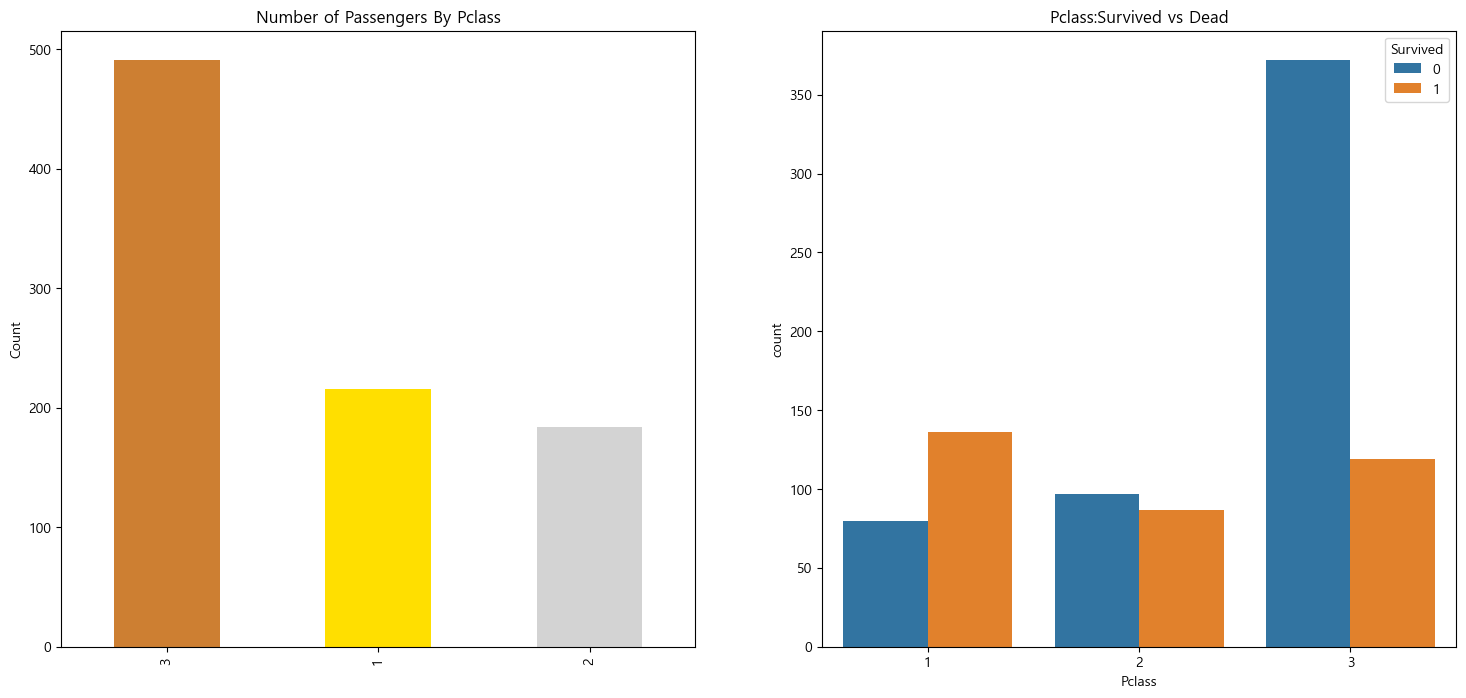

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show();

In [47]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

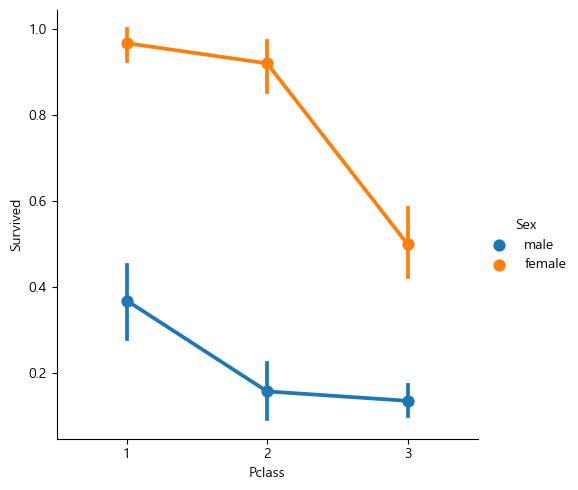

In [48]:
sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', kind='point')
plt.show();

In [49]:
## Age--> Continous Feature
print('Oldest Passenger was of:', data.Age.max(), 'Years')
print('Youngest Passenger was of:', data.Age.min(), 'Years')
print('Average Age on the ship:', round(data.Age.mean(), 2), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


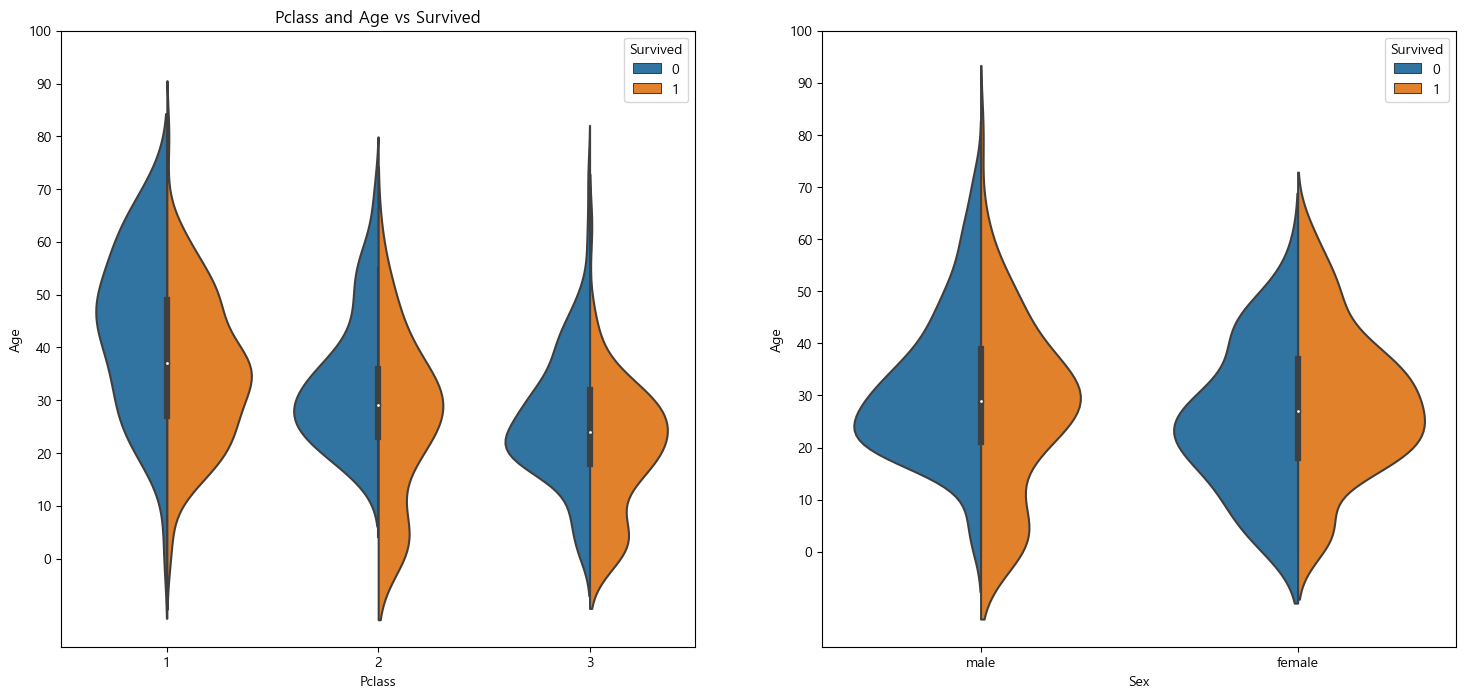

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_yticks(range(0,110,10))
plt.show();

In [51]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# .extract: 정규표현식으로 조건 문자 추출

In [52]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [53]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)
data.groupby('Initial')['Age'].mean()
# data.pivot_table(index='Initial', values='Age', aggfunc='mean')

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [54]:
tmp = data.groupby('Initial')['Age'].mean()
for title, age in tmp.items():
    data.loc[(data.Age.isnull())&(data.Initial==title), 'Age'] = round(age)
data.Age.isnull().any()
# any: 참값이 하나라도 존재하는가
# data.Age.notnull().all()
# all: 전부 참값인가

False

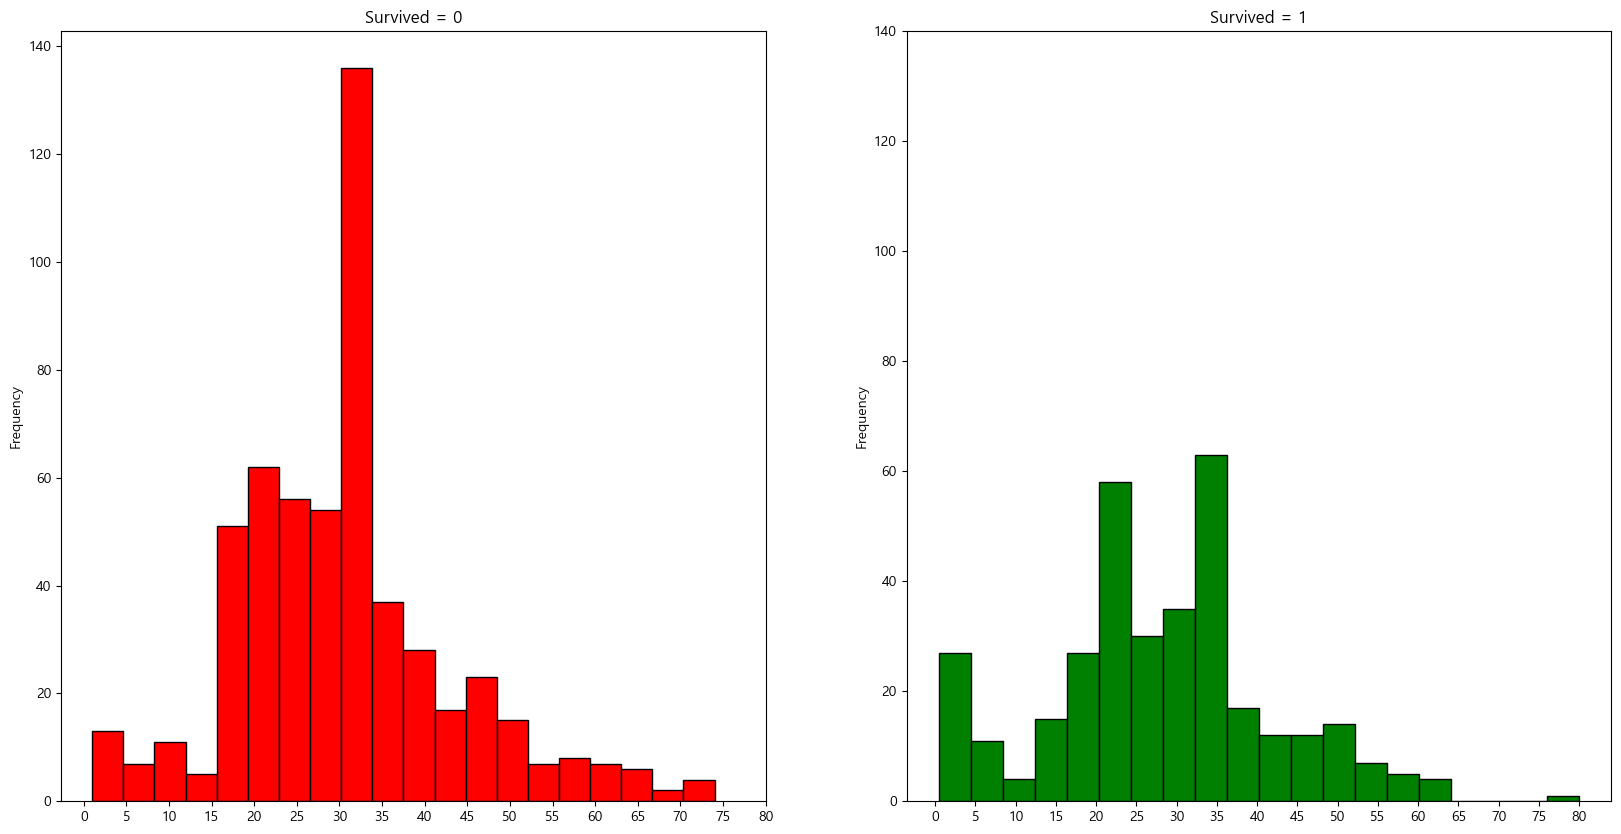

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
data[data.Survived==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
# bins: 막대 개수
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0,85,5))
ax[0].set_yticks(range(0,141,20))
data[data.Survived==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='g')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))
ax[1].set_yticks(range(0,141,20))
plt.show();

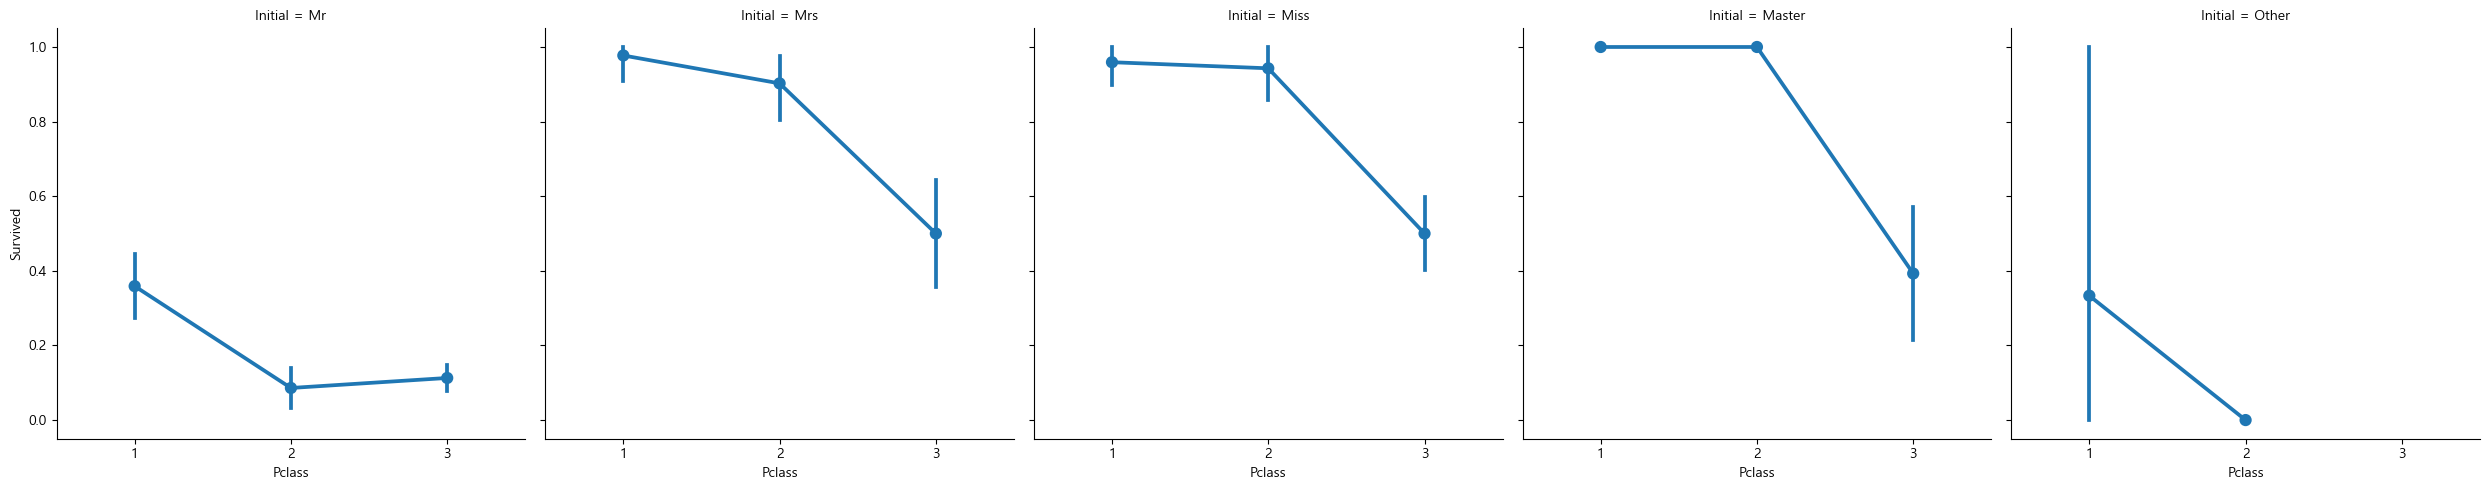

In [56]:
sns.catplot(data=data, x='Pclass', y='Survived', col='Initial', kind='point')
plt.show()

In [57]:
## Embarked -> Categorical Value
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

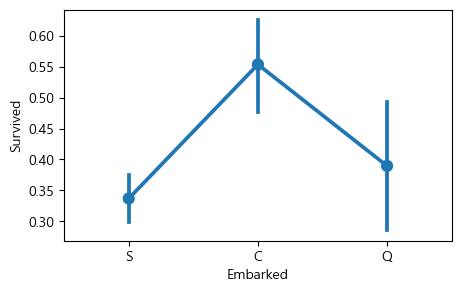

In [58]:
sns.pointplot(data=data, x='Embarked', y='Survived')
fig = plt.gcf()
# gcf: 현재 figure 반환, gca: 현재 axes 반환
fig.set_size_inches(5, 3)
plt.show;

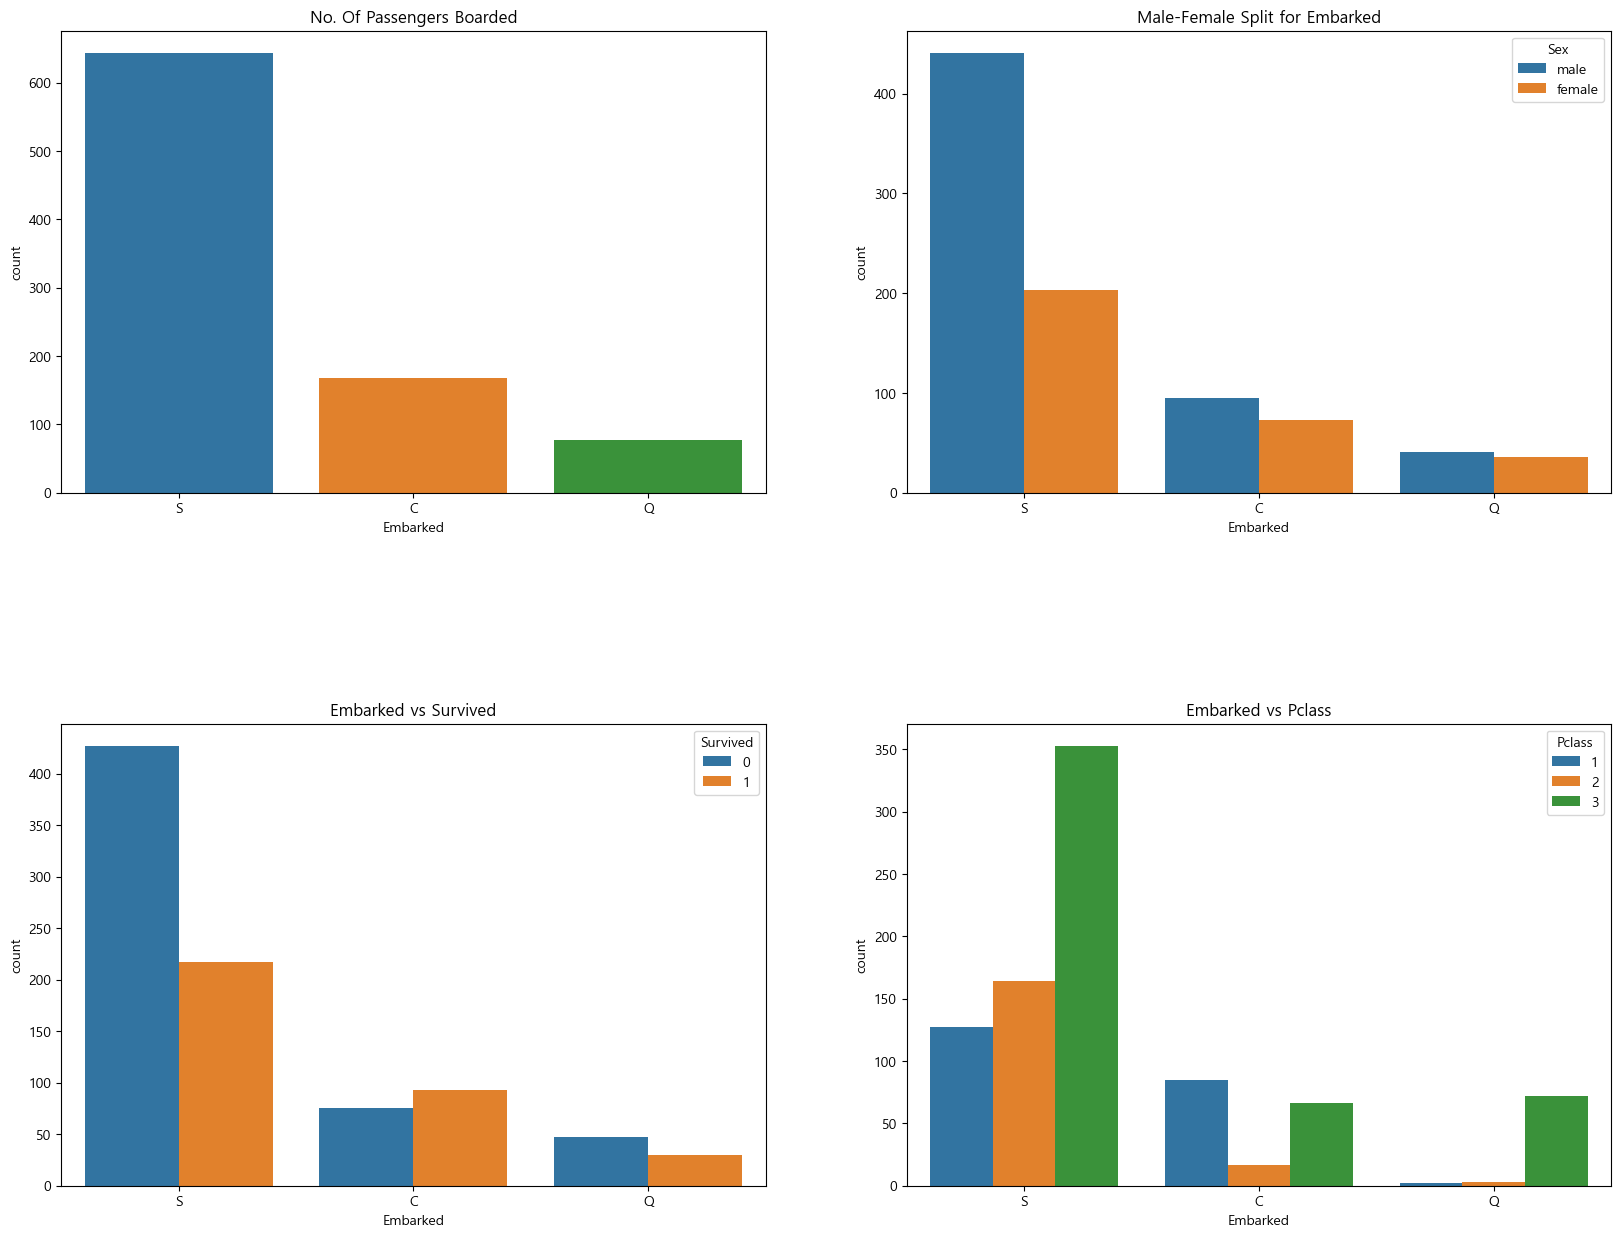

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data=data, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

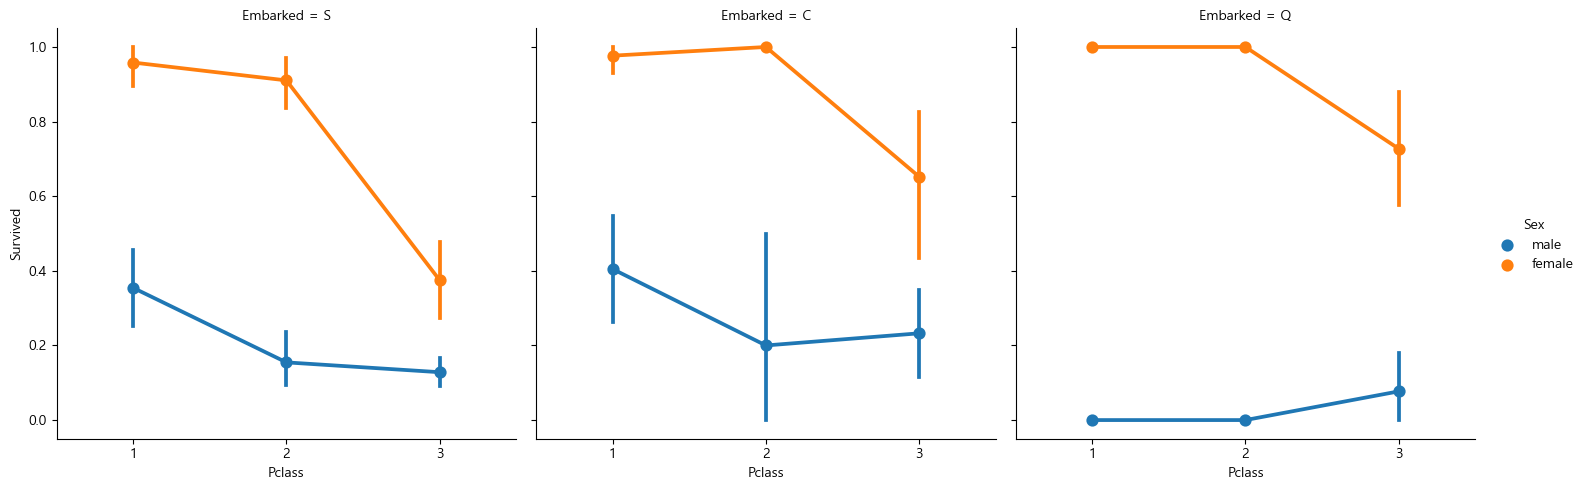

In [60]:
sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')
plt.show();

In [61]:
data.Embarked.fillna('s', inplace=True)
data.Embarked.isnull().any()

False

In [62]:
## SibSip-->Discrete Feature¶
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


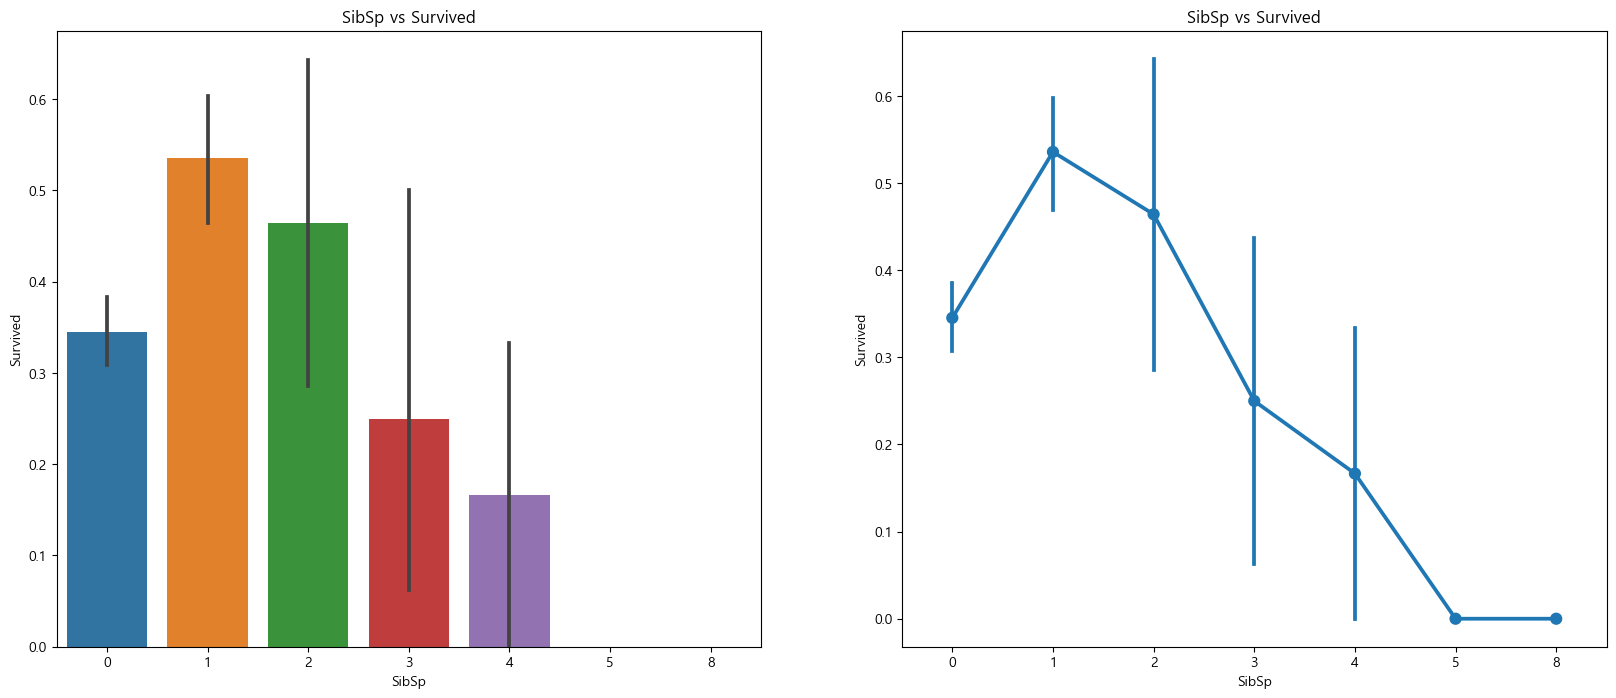

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show();

In [64]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [65]:
## Parch

pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


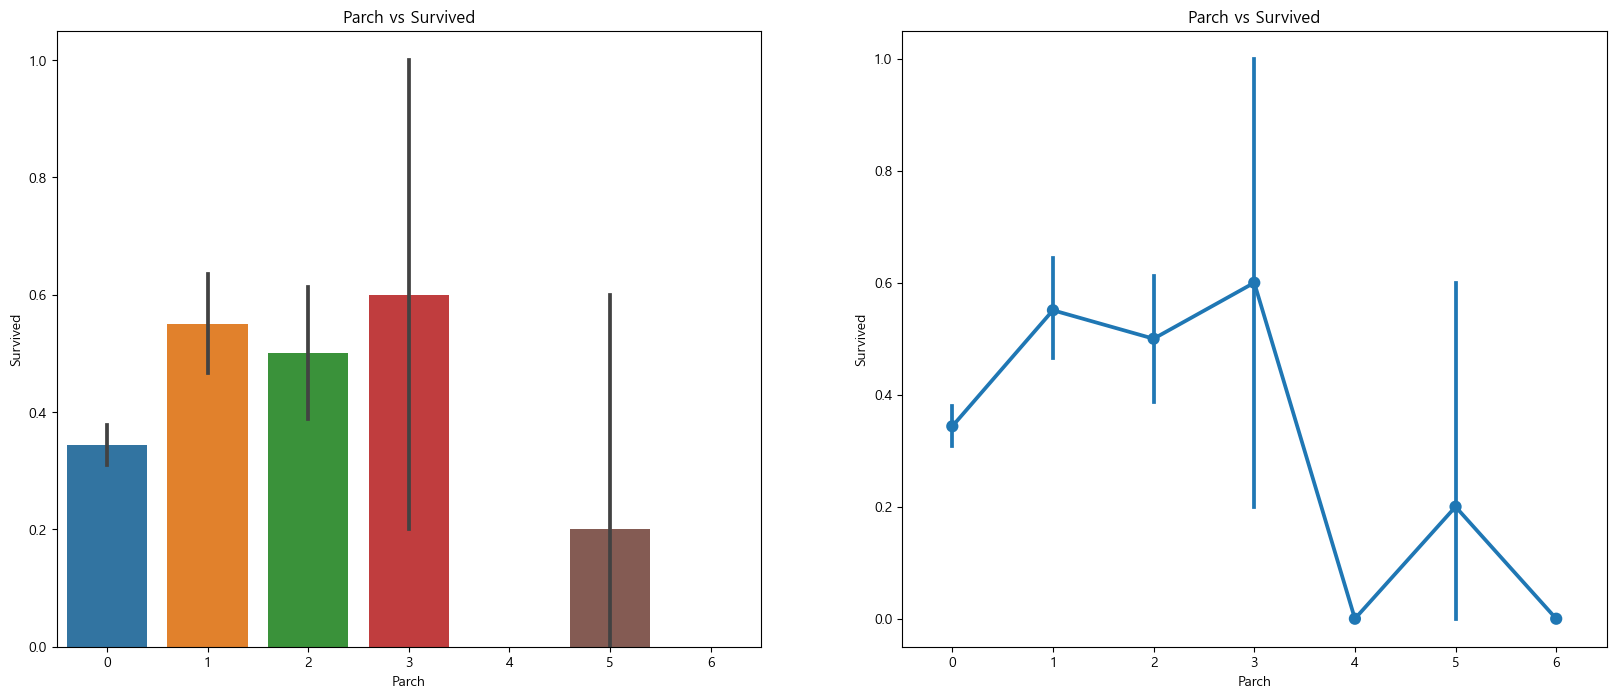

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show();

In [67]:
## Fare -> Continous Feature
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


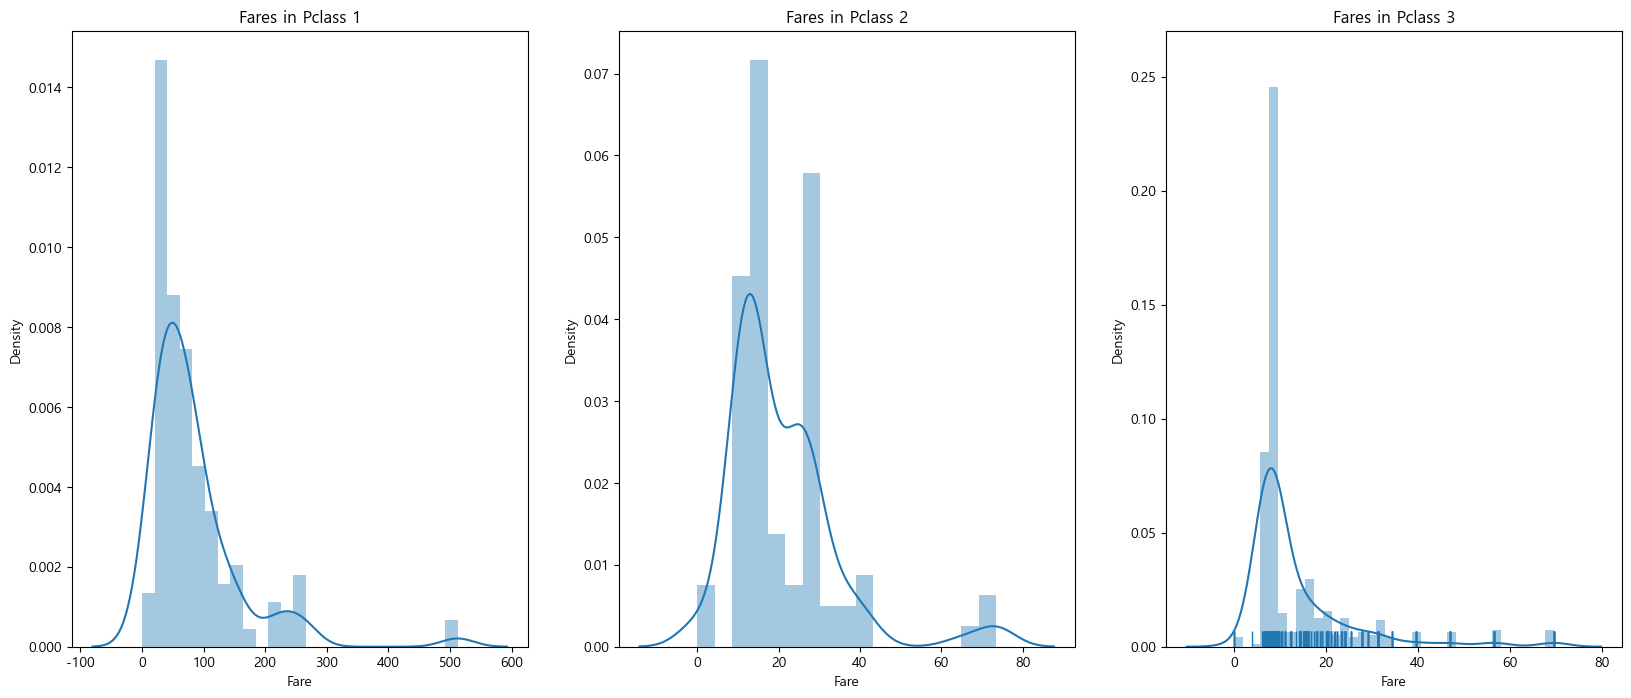

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2], kde=True, rug=True)
# kde: 커널 밀도(kernel density)로 분포 곡선 표기
# rug: 선분(rug)로 실제 데이터 위치 표기
ax[2].set_title('Fares in Pclass 3')
plt.show();

### 원문
Observations in a Nutshell for all features:  
  
Sex: The chance of survival for women is high as compared to men.  
  
Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.  

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.  
  
Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.  
  
Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.  
  
### Deepl 번역
모든 기능에 대한 관찰 결과 요약:  
  
성별: 여성이 남성에 비해 생존 확률이 높습니다.  
  
클래스: 1등석 승객일수록 생존 확률이 높아지는 경향이 뚜렷합니다. P클래스3의 생존율은 매우 낮습니다. 여성의 경우, P클래스1의 생존 확률은 거의 1에 가깝고 P클래스2의 생존 확률도 높습니다. 돈이 이긴다!!!.  
  
나이: 5-10세 미만의 어린이는 생존 확률이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.  
  
승선: 이것은 매우 흥미로운 특징입니다. C에서의 생존 가능성은 대부분의 P클래스1 승객이 S에서 일어났음에도 불구하고 Q의 승객이 모두 P클래스3 출신인 것보다 더 나은 것으로 보입니다.  
  
Parch+SibSp: 혼자 탑승하거나 대가족이 함께 여행하는 것보다 1~2명의 형제자매, 배우자 또는 1~3명의 부모님이 탑승하는 것이 더 높은 확률을 보입니다.  

## Correlation Between The Features

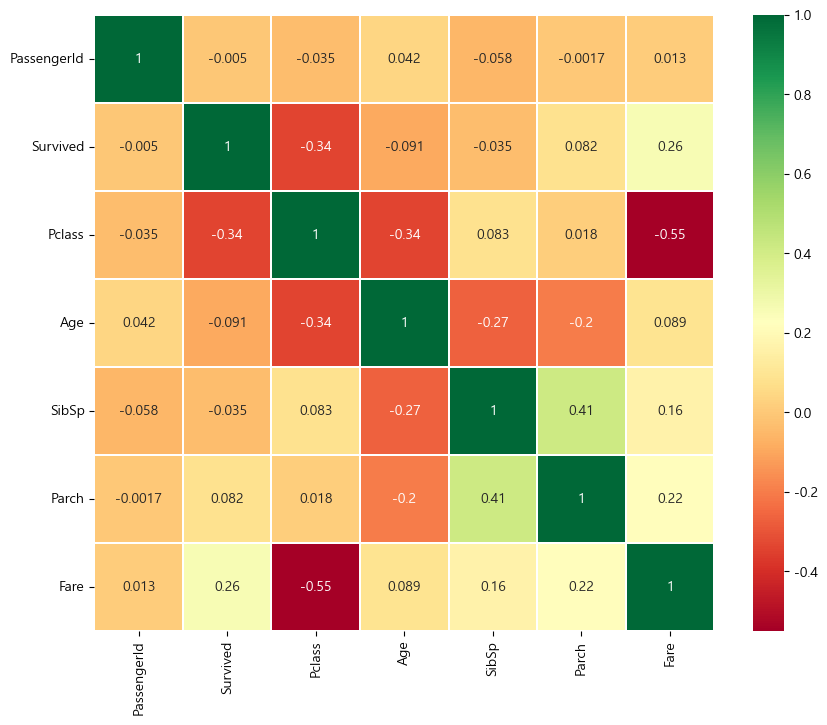

In [69]:
data2 = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show();

# data2 = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# plt.figure(figsize=(10,8))
# sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# plt.show();

### 원문
Interpreting The Heatmap  

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.  
  
POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.  
  
NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.  
  
Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.  
  
So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.  
  
Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.  
  
### DeepL 번역
히트맵 해석하기  
  
가장 먼저 주목해야 할 점은 알파벳이나 문자열 간의 상관관계는 알 수 없으므로 숫자 특징만 비교한다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.  
  
양의 상관관계: 특징 A의 증가가 특징 B의 증가로 이어지면 양의 상관관계가 있는 것입니다. 값이 1이면 완벽한 양의 상관관계를 의미합니다.  
  
음의 상관관계: 기능 A의 증가가 기능 B의 감소로 이어지면 음의 상관관계입니다. 값 -1은 완벽한 음의 상관관계를 의미합니다.  
  
이제 두 피처의 상관관계가 매우 높거나 완벽하여 한 피처의 증가가 다른 피처의 증가로 이어진다고 가정해 보겠습니다. 이는 두 특징이 매우 유사한 정보를 포함하고 있으며 정보의 분산이 거의 없거나 전혀 없다는 것을 의미합니다. 두 특징 모두 거의 동일한 정보를 포함하고 있기 때문에 이를 다중선형성이라고 합니다.  
  
그렇다면 둘 중 하나는 중복되므로 둘 다 사용해야 할까요? 모델을 만들거나 학습할 때 중복 기능을 제거하면 학습 시간이 단축되는 등 여러 가지 이점이 있으므로 중복 기능을 제거하도록 노력해야 합니다.  
  
이제 위의 히트맵에서 특징들 간의 상관관계가 크지 않다는 것을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이의 상관관계, 즉 0.41입니다. 따라서 모든 기능을 계속 사용할 수 있습니다.

## Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?  
  
Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.  
  
An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

In [70]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')
# to_frame: DataFrame으로 변환

,Age_band
1,382
2,325
0,104
3,69
4,11


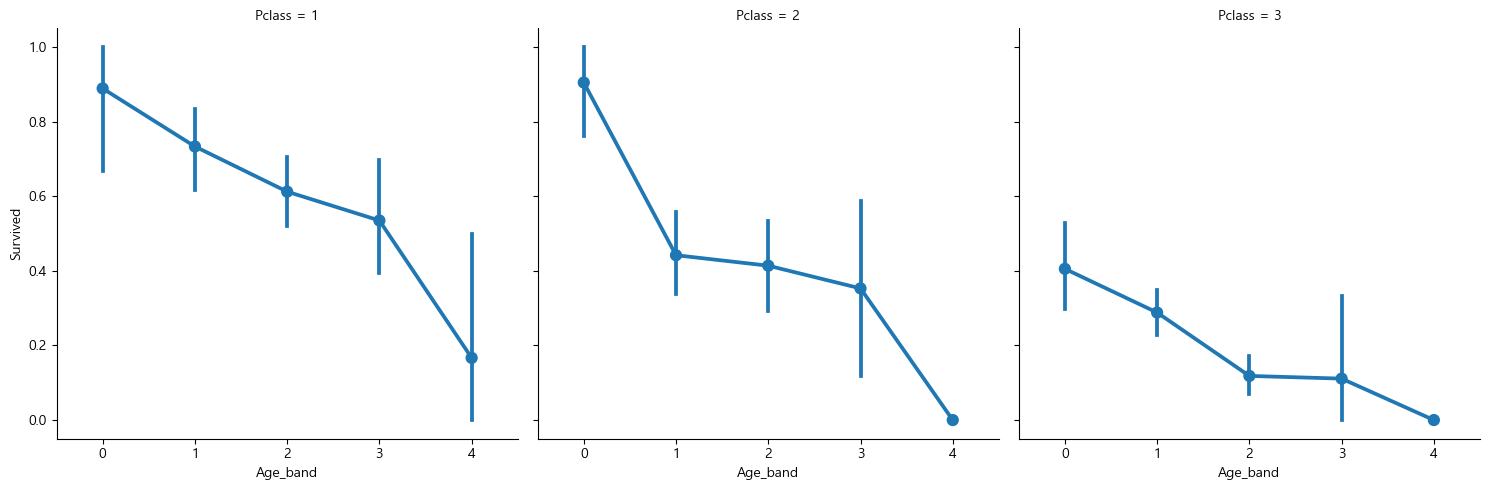

In [71]:
sns.catplot(data=data, x='Age_band', y='Survived', col='Pclass', kind='point');

### Family_Size and Alone

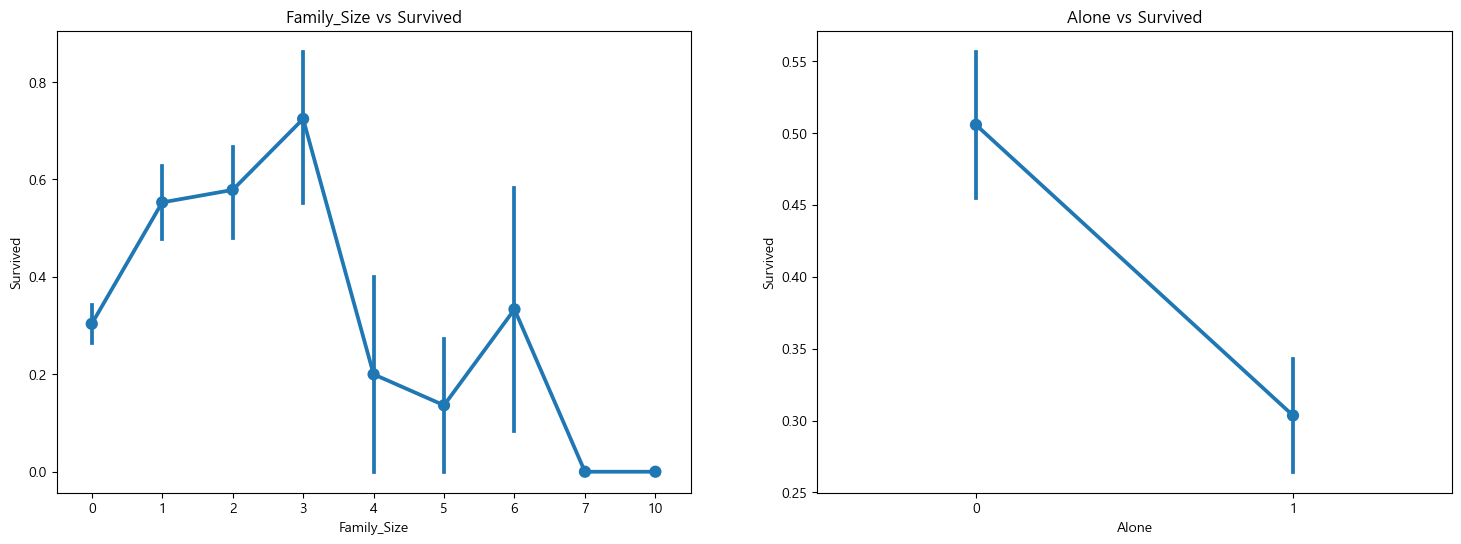

In [72]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

## 아래 코드가 원본 코드인데 subplot에 들어가지 않는다. factorplot과 catplot의 차이인 듯
# fig, ax = plt.subplots(1, 2, figsize=(18,6))
# sns.catplot(data=data, x='Family_Size', y='Survived', ax=ax[0], kind='point')
# ax[0].set_title('Family_Size vs Survived')
# sns.catplot(data=data, x='Alone', y='Survived', ax=ax[1], kind='point')
# ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot(data=data, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(data=data, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

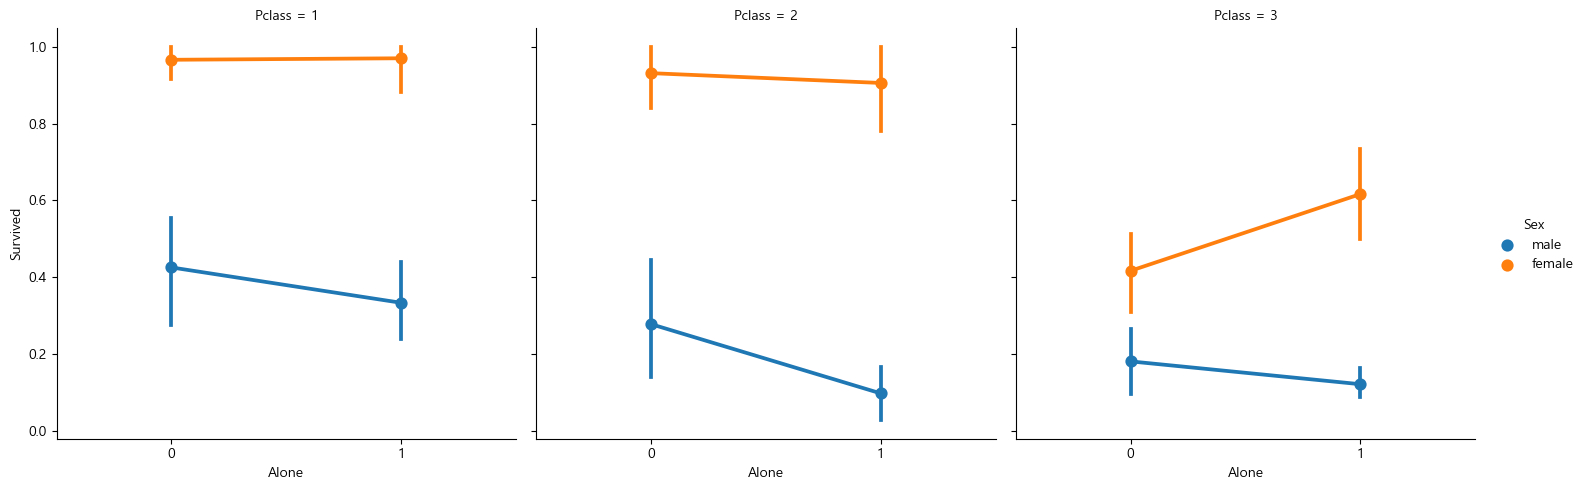

In [73]:
sns.catplot(data=data, x='Alone', y='Survived', hue='Sex', col='Pclass', kind='point')
plt.show()

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.  
  
So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.  

### DeepL 번역
요금도 연속적인 기능이기 때문에 서수 값으로 변환해야 합니다. 이를 위해 pandas.qcut을 사용합니다.

qcut은 우리가 전달한 구간차원 수에 따라 값을 분할하거나 정렬합니다. 따라서 5개의 구간차원을 전달하면 값을 5개의 개별 구간차원 또는 값 범위로 동일한 간격으로 정렬합니다.

In [74]:
data['Fare_Range'] = pd.qcut(x=data['Fare'], q=4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
# data.pivot_table(index='Fare_Range', values='Survived', aggfunc='mean').style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


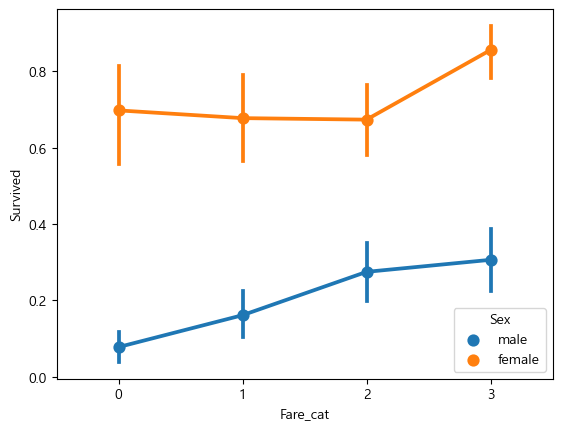

In [75]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[data['Fare']>31, 'Fare_cat'] = 3
sns.pointplot(data=data, x='Fare_cat', y= 'Survived', hue='Sex')
plt.show();

### Converting String Values into Numeric

In [76]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 's', 'C', 'Q'], [0,0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)
data[['Sex', 'Embarked', 'Initial']].head()

,Sex,Embarked,Initial
0,0,0,0
1,1,1,1
2,1,0,2
3,1,0,1
4,0,0,0


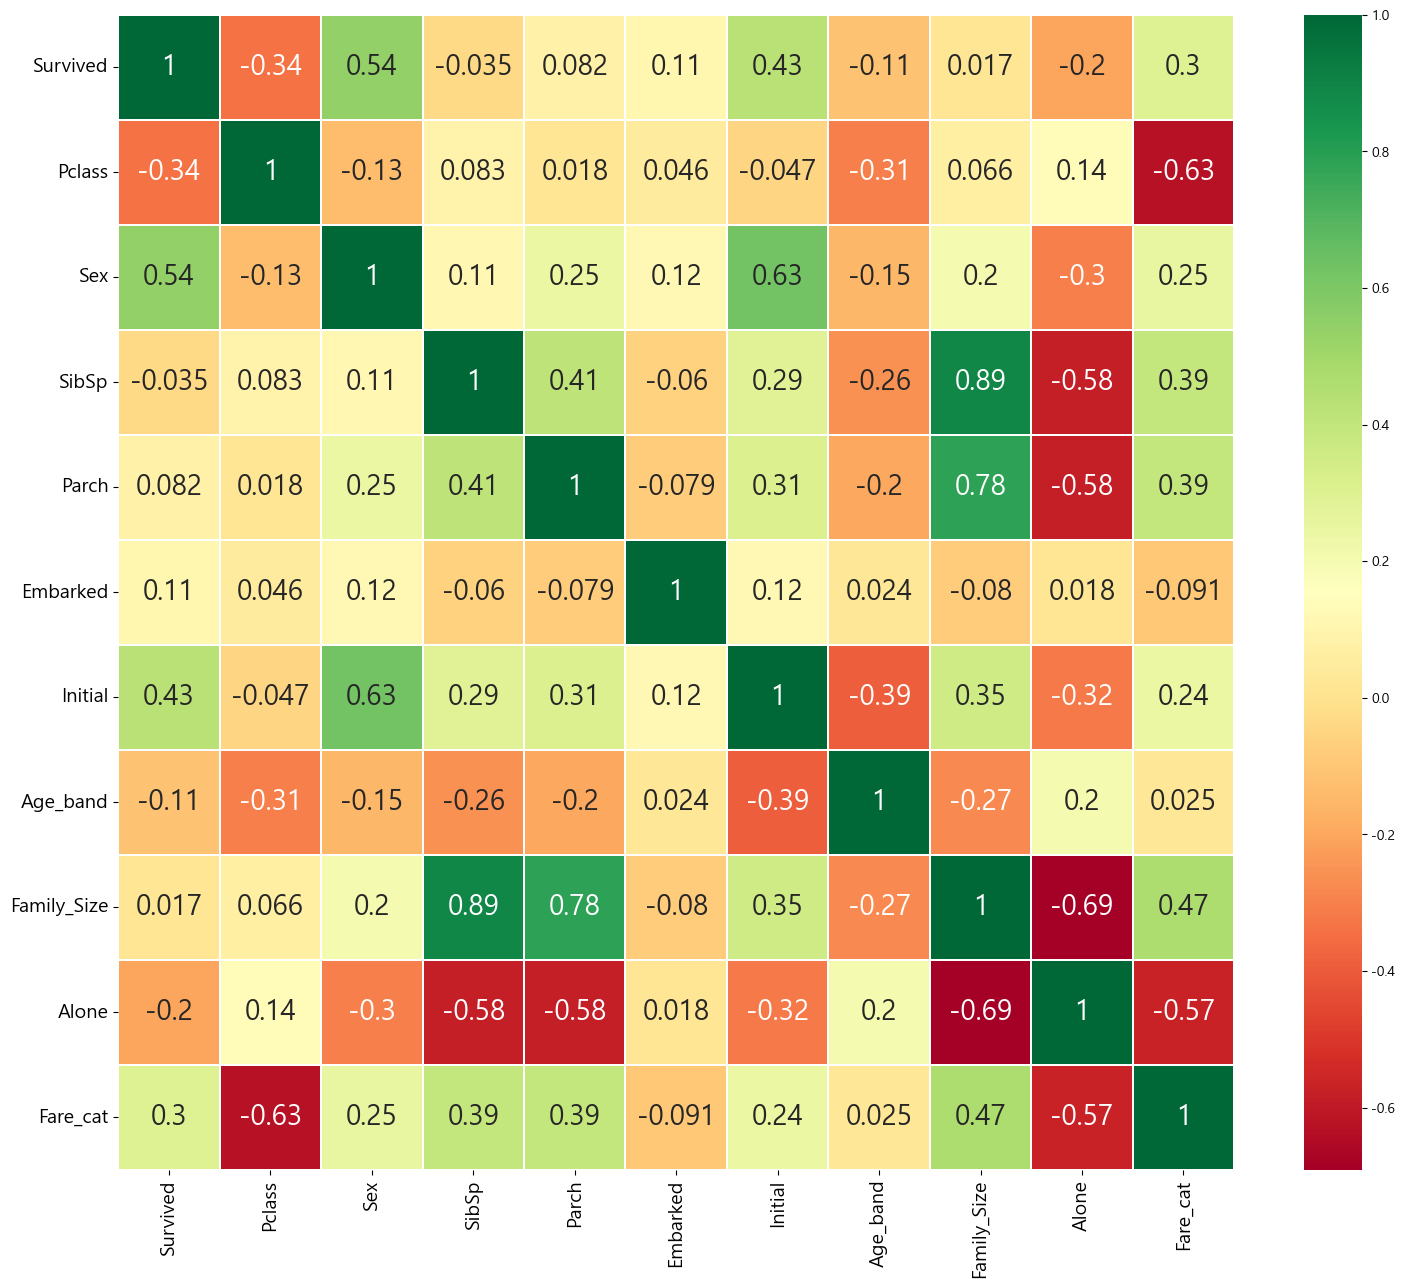

In [77]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

## Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix

In [79]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# stratify: 데이터 비율 맞춰서 배분

train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']

## X, y로 train_test_split 사용할 경우
# X = data[data.columns[1:]]
# y = data['Survived']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=data['Survived'])

In [80]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_y))

Accuracy for rbf SVM is 0.835820895522388


In [81]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_y))

Accuracy for linear SVM is 0.8171641791044776


In [82]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction3 = model.predict(test_X)
print('Accuracy for LogisticRegression is', metrics.accuracy_score(prediction3, test_y))

Accuracy for LogisticRegression is 0.8134328358208955


In [83]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction4 = model.predict(test_X)
print('Accuracy for DecisionTreeClassifier is', metrics.accuracy_score(prediction4, test_y))

Accuracy for DecisionTreeClassifier is 0.7985074626865671


In [84]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction5 = model.predict(test_X)
print('Accuracy for KNeighborsClassifier is', metrics.accuracy_score(prediction5, test_y))

Accuracy for KNeighborsClassifier is 0.8134328358208955


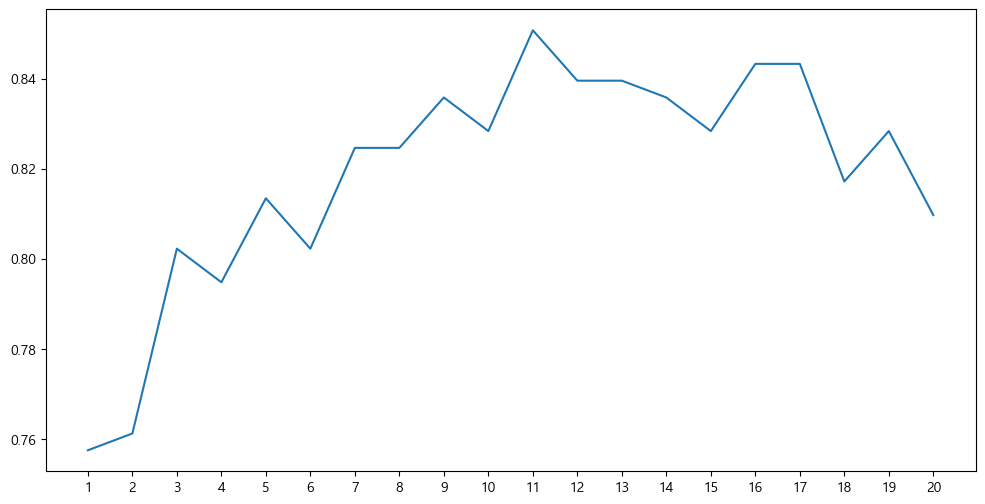

Accuracies for different value of n are: [0.7574626865671642, 0.7611940298507462, 0.8022388059701493, 0.7947761194029851, 0.8134328358208955, 0.8022388059701493, 0.8246268656716418, 0.8246268656716418, 0.835820895522388, 0.8283582089552238, 0.8507462686567164, 0.8395522388059702, 0.8395522388059702, 0.835820895522388, 0.8283582089552238, 0.8432835820895522, 0.8432835820895522, 0.8171641791044776, 0.8283582089552238, 0.8097014925373134] 
with the max value as 0.8507462686567164


In [85]:
a = []
a_index = list(range(1,21))

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a.append(metrics.accuracy_score(prediction, test_y))

plt.plot(a_index, a)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different value of n are:', a, '\nwith the max value as', max(a))

In [86]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction6 = model.predict(test_X)
print('Accuracy for NaveBayes is', metrics.accuracy_score(prediction6, test_y))

Accuracy for NaveBayes is 0.8134328358208955


In [87]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction7, test_y))

Accuracy for Random Forests is 0.8208955223880597


In [88]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict   

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]

classifiers = ['Radial Svm', 'Linear Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='rbf'), 
        svm.SVC(kernel='linear'), 
        LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=9), 
        DecisionTreeClassifier(), 
        GaussianNB(), 
        RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Radial Svm,0.828377,0.057096
Linear Svm,0.784607,0.057841
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.803608,0.044649
Naive Bayes,0.795843,0.054861
Random Forest,0.812609,0.043615


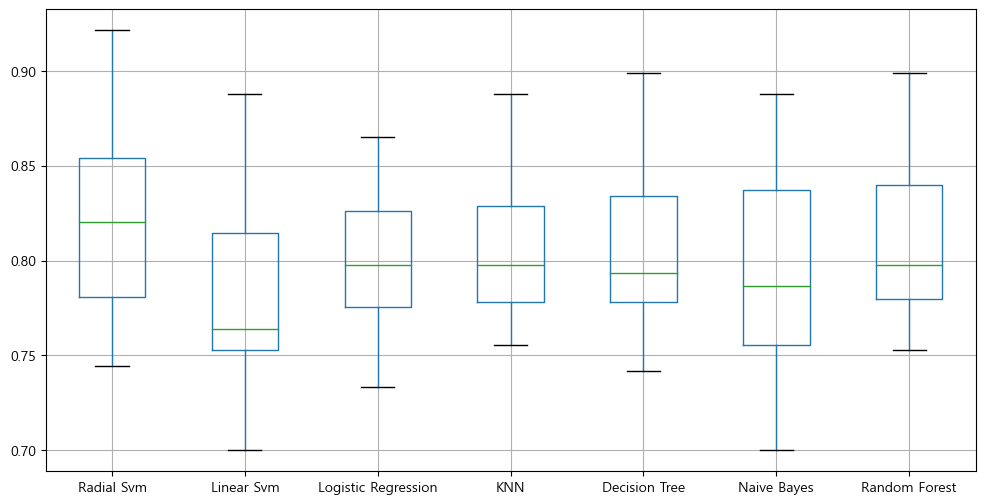

In [89]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot();

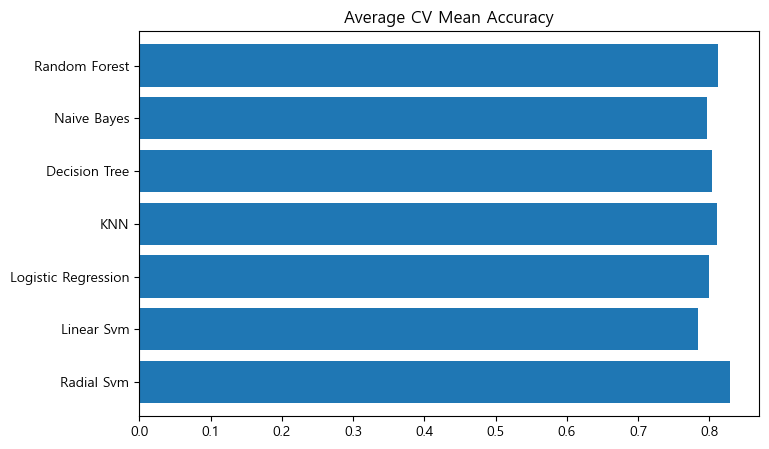

In [90]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

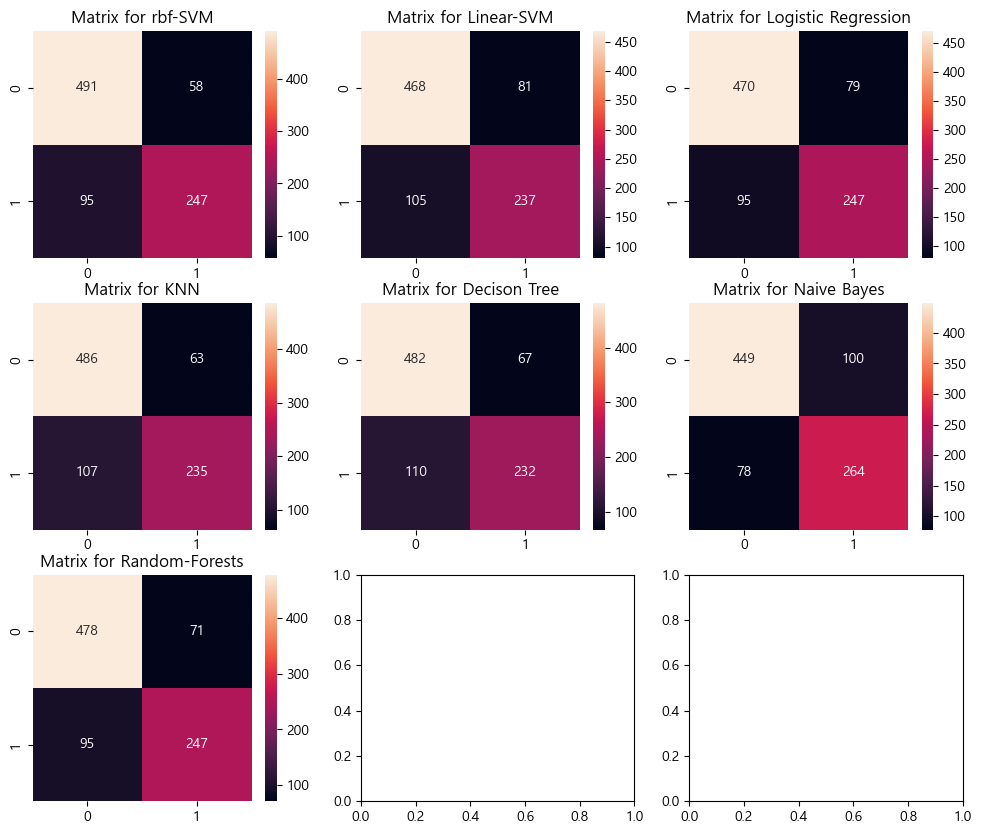

In [91]:
# Counfusion Matrix
['Radial Svm', 'Linear Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
fig, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Decison Tree')

y_pred = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Random-Forests')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Hyper-Parameters Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
## SVM
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
kernel = ['rbf', 'linear']
hyper_parameter = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [94]:
## Random Forests
n_estimators=range(100, 1000, 100)
max_depth = [1,3,5,7,10]
hyper_parameter = {'n_estimators': n_estimators, 'max_depth': max_depth}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
0.8327537505492437
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)


### Ensembling

In [95]:
## Voting Classifier

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_y))
cross = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8215480649188514


In [96]:
## Bagging
### Bagged KNN

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated accuracy for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated accuracy for bagged KNN is: 0.8104244694132333


In [97]:
### Bagged Desicsion Tree

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy for bagged Desicsion Tree is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated accuracy for bagged Desicsion Tree is:', result.mean())

The accuracy for bagged Desicsion Tree is: 0.8208955223880597
The cross validated accuracy for bagged Desicsion Tree is: 0.8171410736579275


In [98]:
### Boosting
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())
print('='*80)

#### Hyper-parameter Tuning for AdaBoost
n_estimators = list(range(100,1100,100))
learn_rate = [.05, .1, .2, .25, .3, .4, .5, .6, .7, .8, .9, 1.]
hyper_parameter = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

The cross validated score for Gradient Boosting is: 0.8249188514357055
Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [100]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


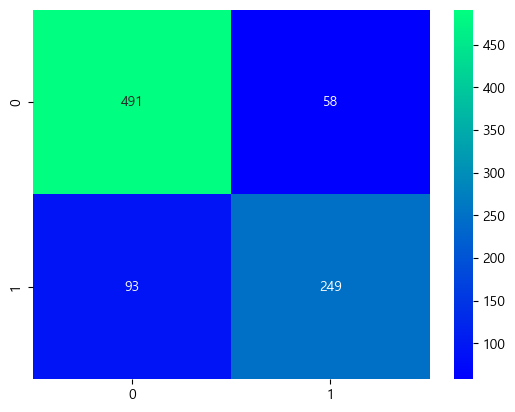

In [101]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show();

## Feature Importance

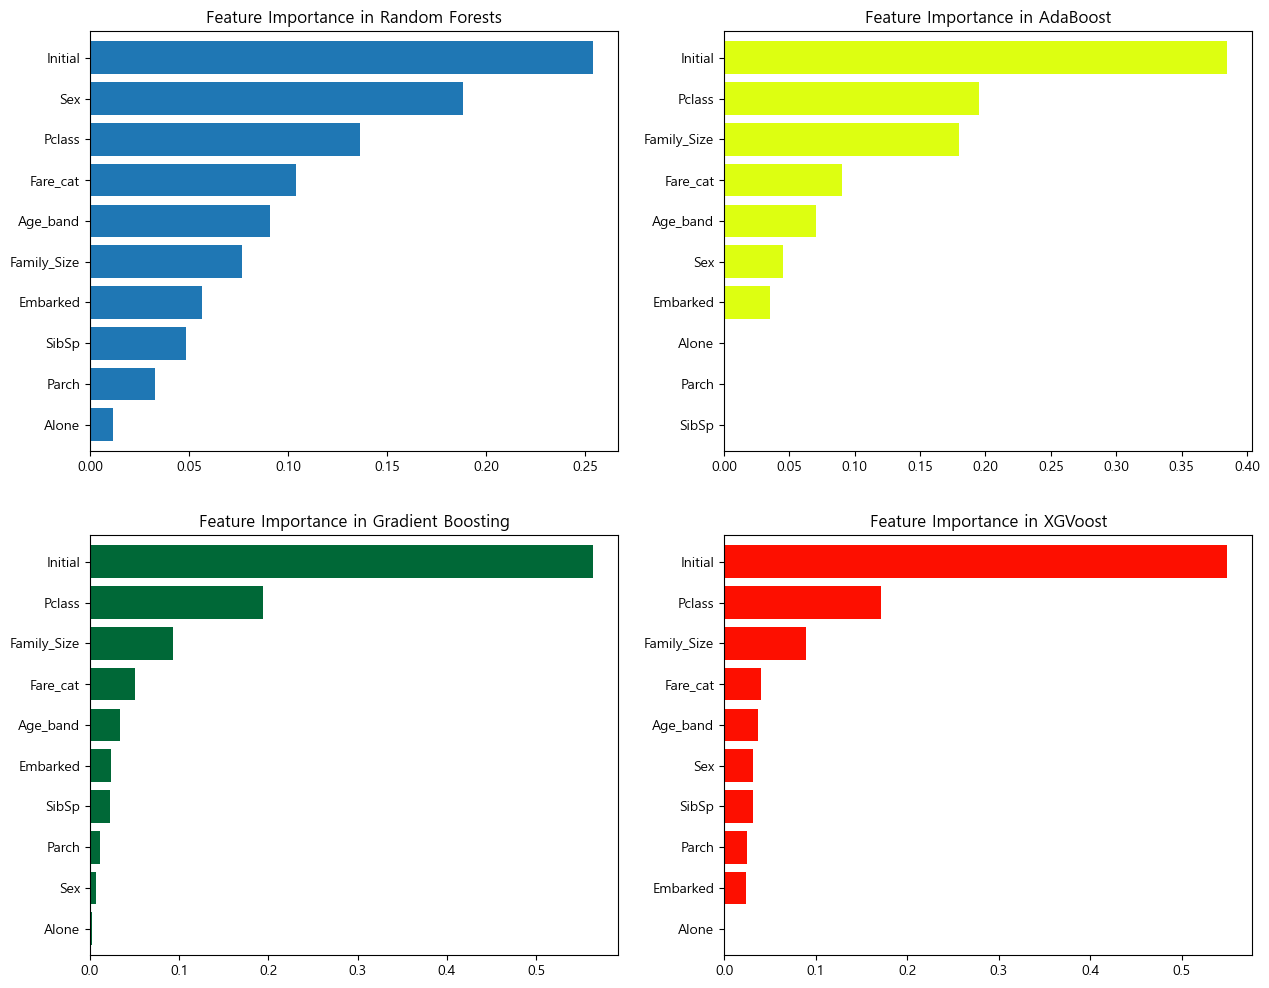

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XGVoost')

plt.show();

## conclusion

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

Observations:  
1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are: 

1) [For R: Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/code/pliptor/divide-and-conquer-0-82296?scriptVersionId=4027429)

2) [For Python: Pytanic by Heads and Tails](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

3) [For Python: Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.

## DeeL 번역
RandomForests, AdaBoost 등과 같은 다양한 분류기의 중요한 기능을 확인할 수 있습니다.

관찰:  
1)공통적으로 중요한 기능 중 일부는 Initial, Fare_cat, Pclass, Family_Size입니다.

2)성별(Sex) 기능은 중요하지 않은 것으로 보이는데, 앞서 성별과 Pclass의 조합이 매우 좋은 차별화 요소를 제공한다는 것을 보았기 때문에 충격적입니다. 섹스는 랜덤포레스트에서만 중요한 것으로 보입니다.

그러나 많은 분류기에서 최상위에 있는 Initial이라는 특징을 볼 수 있는데, 이미 Sex와 Initial은 양의 상관관계를 보았기 때문에 둘 다 성별을 의미한다고 볼 수 있습니다.  

3)마찬가지로 Pclass와 Fare_cat은 승객의 상태를, Family_Size는 Alone, Parch, SibSp와 함께 승객의 상태를 나타냅니다.

여러분 모두 머신 러닝에 대한 인사이트를 얻으셨기를 바랍니다. 머신러닝을 위한 다른 훌륭한 노트북은 다음과 같습니다: 
1) [R용: 나누고 정복하기(Oscar Takeshita 저)](https://www.kaggle.com/code/pliptor/divide-and-conquer-0-82296?scriptVersionId=4027429)

2) [Python용: 머리와 꼬리의 파이타닉(Pytanic)](https://www.kaggle.com/code/headsortails/pytanic/notebook)

3) [Python용: 이방성을 이용한 앙상블/스태킹 소개](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

이 노트북을 살펴봐 주셔서 감사합니다. 이 노트북이 유용했다면 업보트를 해 주세요.

https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook

https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook